# imports

In [5]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

<IPython.core.display.Javascript object>

In [8]:
url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data"
df = pd.read_csv(url)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<IPython.core.display.Javascript object>

# Linear Regression model

## Prepare dataset

In [10]:
# X var for all columns except target ('status') and name
X = df.drop(columns=["status", "name"])

# create y var for target var ('status') column only
y = df["status"]

<IPython.core.display.Javascript object>

## Create train set & test set

In [15]:
# split data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

<IPython.core.display.Javascript object>

## Create & fit model

In [17]:
# instance of logistic regression classifier
lr = LogisticRegression(
    solver="lbfgs", 
    penalty="none", 
    max_iter=1000, 
    random_state=7
)

# fit classifier to data
lr.fit(
    X_train, 
    y_train
)

LogisticRegression(max_iter=1000, penalty='none', random_state=7)

<IPython.core.display.Javascript object>

## model accuracy score

In [18]:
# calculate and print accuracy score
print("accuracy score: %s" % lr.score(X_test, y_test))
print("# of iterations %s" % lr.n_iter_[0])

accuracy score: 0.8775510204081632
# of iterations 887


<IPython.core.display.Javascript object>

## L2 regularization accuracy score

In [25]:
# calc scores with L2 regularization
reg_lr = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=1000, random_state=7)

# fit classifier to regularized data
reg_lr.fit(X_train, y_train)

# train and test scores
train_score = reg_lr.score(X_train, y_train)
test_score = reg_lr.score(X_test, y_test)

print("train score: %s" % train_score)
print("test score: %s" % test_score)
print("# of iterations %s" % reg_lr.n_iter_[0])

train score: 0.8561643835616438
test score: 0.8775510204081632
# of iterations 240


<IPython.core.display.Javascript object>

## C parameter optimization

In [26]:
# create loop from 0.05 to 1.5 by 0.05 to test c values
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(
        solver="lbfgs", penalty="l2", C=c, max_iter=10000, random_state=7
    )
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))

<IPython.core.display.Javascript object>

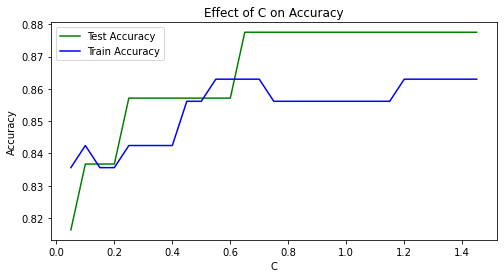

<IPython.core.display.Javascript object>

In [27]:
# plot accuracy scores by c values
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()

> it looks like C=1.2+ would be the best value
---

## Model accuracy with optimized C parameter

In [30]:
# calc scores with L2 regularization
reg_lr = LogisticRegression(
    solver="lbfgs", penalty="l2", C=1.2, max_iter=1000, random_state=7
)

# fit classifier to regularized data
reg_lr.fit(X_train, y_train)

# train and test scores
train_score = reg_lr.score(X_train, y_train)
test_score = reg_lr.score(X_test, y_test)

print("train score: %s" % train_score)
print("test score: %s" % test_score)
print("# of iterations %s" % reg_lr.n_iter_[0])

train score: 0.863013698630137
test score: 0.8775510204081632
# of iterations 316


<IPython.core.display.Javascript object>